In [1]:
import pandas as pd
import seaborn as sb
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import os
import shutil
import posixpath
import wfdb

In [3]:

# Download all the WFDB records and annotations from a small PhysioNet Database

# Make a temporary download directory in your current working directory
#cwd = os.getcwd()
#dl_dir = os.path.join(cwd, 'tmp_dl_dir')

# Download all the WFDB content
#wfdb.dl_database('apnea-ecg', dl_dir=dl_dir)

# Display the downloaded content in the folder
#display(os.listdir(dl_dir))

In [4]:
#Download the file
df = pd.read_csv('apnee.csv')

In [5]:
df.head()

,Record,Length minutes,Non-apnminutes,apnea,hours(w/apenea),AI,HI,AHI,age,sex,height,weight
0,a01,490.0,20.0,470.0,9.0,12.5,57.1,69.6,51.0,M,175.0,102.0
1,a02,529.0,109.0,420.0,9.0,57.2,12.3,69.5,38.0,M,180.0,120.0
2,a03,520.0,274.0,246.0,9.0,38.4,0.7,39.1,54.0,M,168.0,80.0
3,a04,493.0,40.0,453.0,9.0,73.4,4.0,77.4,52.0,M,173.0,121.0
4,a05,455.0,179.0,276.0,8.0,35.0,6.0,41.0,58.0,M,176.0,78.0


In [6]:
# set conditions for the values of a new column
#AHI is the sum of AI and AHI
conditions = [
    (df['AHI'] >5), 
    (df['AHI'] <= 5)]
values = [1,0]  # 1 mean the patient have apnea
#add the new column
df['positive'] = np.select(conditions, values)

In [7]:
#subset my data
patients = df['sex'].value_counts()

In [8]:
patients # total of patients

M    57
F    13
Name: sex, dtype: int64

In [9]:
# subset data into 2 categories according to AHI score 
healthy = df[df["AHI"] <= 5]
sick = df[df["AHI"] > 5]

In [10]:
# set new conditions for a coumn in the subdata sick
#AHI is the sum of AI and AHI
conditions = [
    (sick['AHI'] <= 15), 
    (sick['AHI'] >= 15.01) & (sick['AHI'] <= 30 ),
    (sick['AHI'] > 30)]

values = ['mild', 'moderate', 'severe']
#add the new column
sick['status'] = np.select(conditions, values) # 

<ipython-input-10-f53f0a6cd06e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sick['status'] = np.select(conditions, values) #


In [11]:
sick.tail(10)

,Record,Length minutes,Non-apnminutes,apnea,hours(w/apenea),AI,HI,AHI,age,sex,height,weight,positive,status
55,x20,514.0,250.0,264.0,8.0,34.0,9.0,43.0,51.0,M,179.0,88.0,1,severe
56,x21,511.0,391.0,120.0,4.0,14.0,5.0,19.0,53.0,M,176.0,85.0,1,moderate
58,x23,528.0,409.0,119.0,3.0,9.9,4.4,14.3,43.0,M,177.0,80.0,1,mild
60,x25,511.0,220.0,291.0,9.0,48.0,0.0,48.0,55.0,M,178.0,90.0,1,severe
61,x26,521.0,177.0,344.0,9.0,14.4,0.7,15.1,57.0,M,171.0,97.0,1,moderate
62,x27,499.0,11.0,488.0,9.0,71.0,4.0,75.0,60.0,M,176.0,113.0,1,severe
63,x28,496.0,62.0,434.0,9.0,71.0,4.0,75.0,60.0,M,176.0,113.0,1,severe
65,x30,512.0,186.0,326.0,9.0,17.0,24.0,41.0,44.0,M,177.0,105.0,1,severe
66,x31,558.0,42.0,516.0,10.0,86.8,6.7,93.5,29.0,F,183.0,100.0,1,severe
67,x32,539.0,114.0,425.0,9.0,63.3,8.5,71.8,29.0,F,183.0,100.0,1,severe


<AxesSubplot:xlabel='weight', ylabel='AHI'>

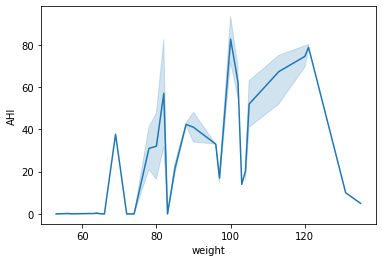

In [12]:
#visualisation relation weight with AHI
sb.lineplot(data=df, x='weight', y='AHI') 

<AxesSubplot:xlabel='age', ylabel='AHI'>

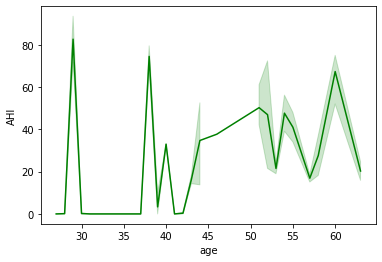

In [13]:
#visualisation relation age with AHI
sb.lineplot(data=df, x='age', y='AHI' , color='green')

<AxesSubplot:xlabel='height', ylabel='AHI'>

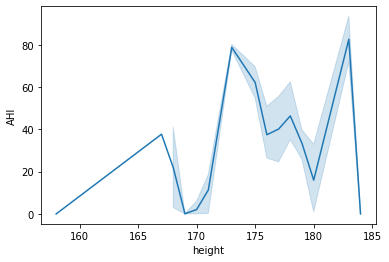

In [14]:
#visualisation relation height with AHI
sb.lineplot(data=df, x='height', y='AHI')

<AxesSubplot:xlabel='Length minutes', ylabel='AHI'>

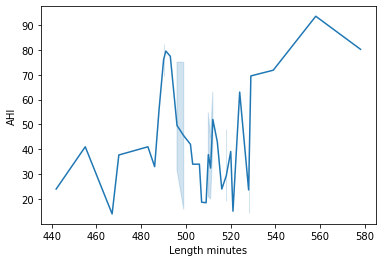

In [15]:
#using the subdata sick to see realtion of time sleep and AHI
sb.lineplot(data=sick, x='Length minutes', y='AHI')

<AxesSubplot:xlabel='hours(w/apenea)', ylabel='AHI'>

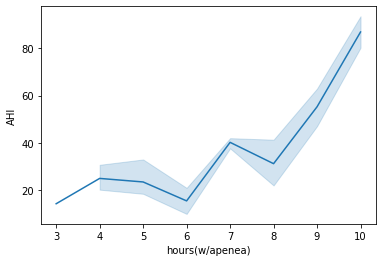

In [16]:
#visualisation relation hours with AHI
sb.lineplot(data=sick, x='hours(w/apenea)', y='AHI')

<AxesSubplot:xlabel='Length minutes', ylabel='AHI'>

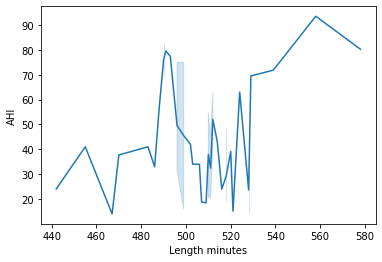

In [17]:
#time sleep and AHI score for sick patients
sb.lineplot(data=sick, x='Length minutes', y='AHI')

<AxesSubplot:xlabel='Length minutes', ylabel='AHI'>

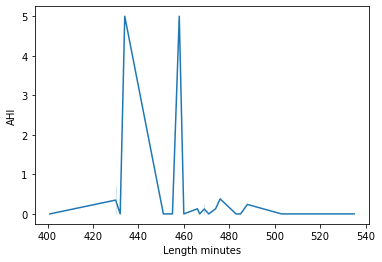

In [18]:
#times sleep and AHI score for healthy patient
sb.lineplot(data=healthy, x='Length minutes', y='AHI')

In [19]:
# patients sicks
ps =pd.concat([sick], axis=1).groupby('status').positive.count()

In [20]:
ps

status
mild         3
moderate    11
severe      31
Name: positive, dtype: int64

<AxesSubplot:xlabel='weight', ylabel='AHI'>

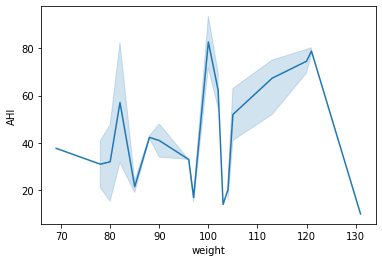

In [21]:
#visualisation variation AHI according weight
sb.lineplot(data=sick, x='weight', y='AHI')

In [22]:
#correlation times apnea and positive
df['apnea'].corr(df['positive'])

0.789703879922743

In [23]:
#correlation hours of apnea with positive
df['hours(w/apenea)'].corr(df['positive'])

0.9173868355933632

In [24]:
# correlation age and positivity
df['age'].corr(df['positive'])

0.672120864894118

<AxesSubplot:xlabel='age', ylabel='AHI'>

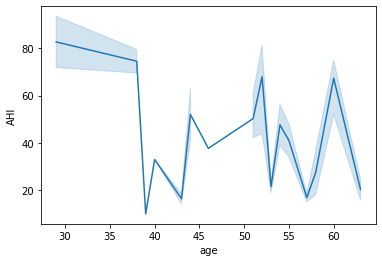

In [25]:
# variation AHI according age
sb.lineplot(data=sick, x='age', y='AHI')

<AxesSubplot:xlabel='positive', ylabel='age'>

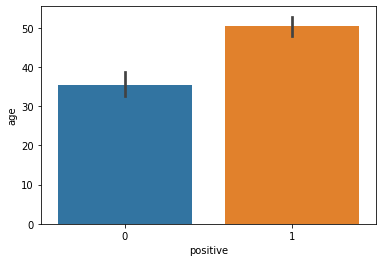

In [26]:
# age positive
sb.barplot(data=df, x='positive', y='age')

In [27]:
#see women in the data
women = df[(df["sex"] == 'F')]
women.head()

,Record,Length minutes,Non-apnminutes,apnea,hours(w/apenea),AI,HI,AHI,age,sex,height,weight,positive
20,b01,488.0,469.0,19.0,2.0,0.12,0.12,0.24,44.0,F,170.0,63.0,0
28,c04,483.0,483.0,0.0,0.0,0.00,0.00,0.00,41.0,F,180.0,65.0,0
29,c05,467.0,464.0,3.0,0.0,0.00,0.00,0.00,28.0,F,169.0,57.0,0
30,c06,469.0,468.0,1.0,0.0,0.00,0.25,0.25,28.0,F,171.0,65.0,0
31,c07,454.0,450.0,4.0,0.0,0.00,0.00,0.00,30.0,F,168.0,56.0,0


In [28]:
#see men in the data
men = df[(df["sex"] == 'M')]
men.head()

,Record,Length minutes,Non-apnminutes,apnea,hours(w/apenea),AI,HI,AHI,age,sex,height,weight,positive
0,a01,490.0,20.0,470.0,9.0,12.5,57.1,69.6,51.0,M,175.0,102.0,1
1,a02,529.0,109.0,420.0,9.0,57.2,12.3,69.5,38.0,M,180.0,120.0,1
2,a03,520.0,274.0,246.0,9.0,38.4,0.7,39.1,54.0,M,168.0,80.0,1
3,a04,493.0,40.0,453.0,9.0,73.4,4.0,77.4,52.0,M,173.0,121.0,1
4,a05,455.0,179.0,276.0,8.0,35.0,6.0,41.0,58.0,M,176.0,78.0,1


In [29]:
healthy.head()

,Record,Length minutes,Non-apnminutes,apnea,hours(w/apenea),AI,HI,AHI,age,sex,height,weight,positive
20,b01,488.0,469.0,19.0,2.0,0.12,0.12,0.24,44.0,F,170.0,63.0,0
23,b04,430.0,420.0,10.0,1.0,0.70,0.00,0.70,42.0,M,180.0,64.0,0
24,b05,434.0,377.0,57.0,3.0,2.00,3.00,5.00,52.0,M,180.0,135.0,0
25,c01,485.0,485.0,0.0,0.0,0.00,0.00,0.00,31.0,M,184.0,74.0,0
26,c02,503.0,502.0,1.0,0.0,0.00,0.00,0.00,37.0,M,180.0,83.0,0


In [30]:
#df.AHI.hist(bins=20)

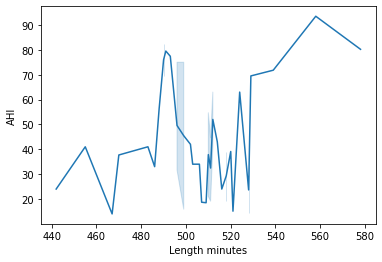

In [31]:
sb.lineplot(data=sick, x='Length minutes', y='AHI');


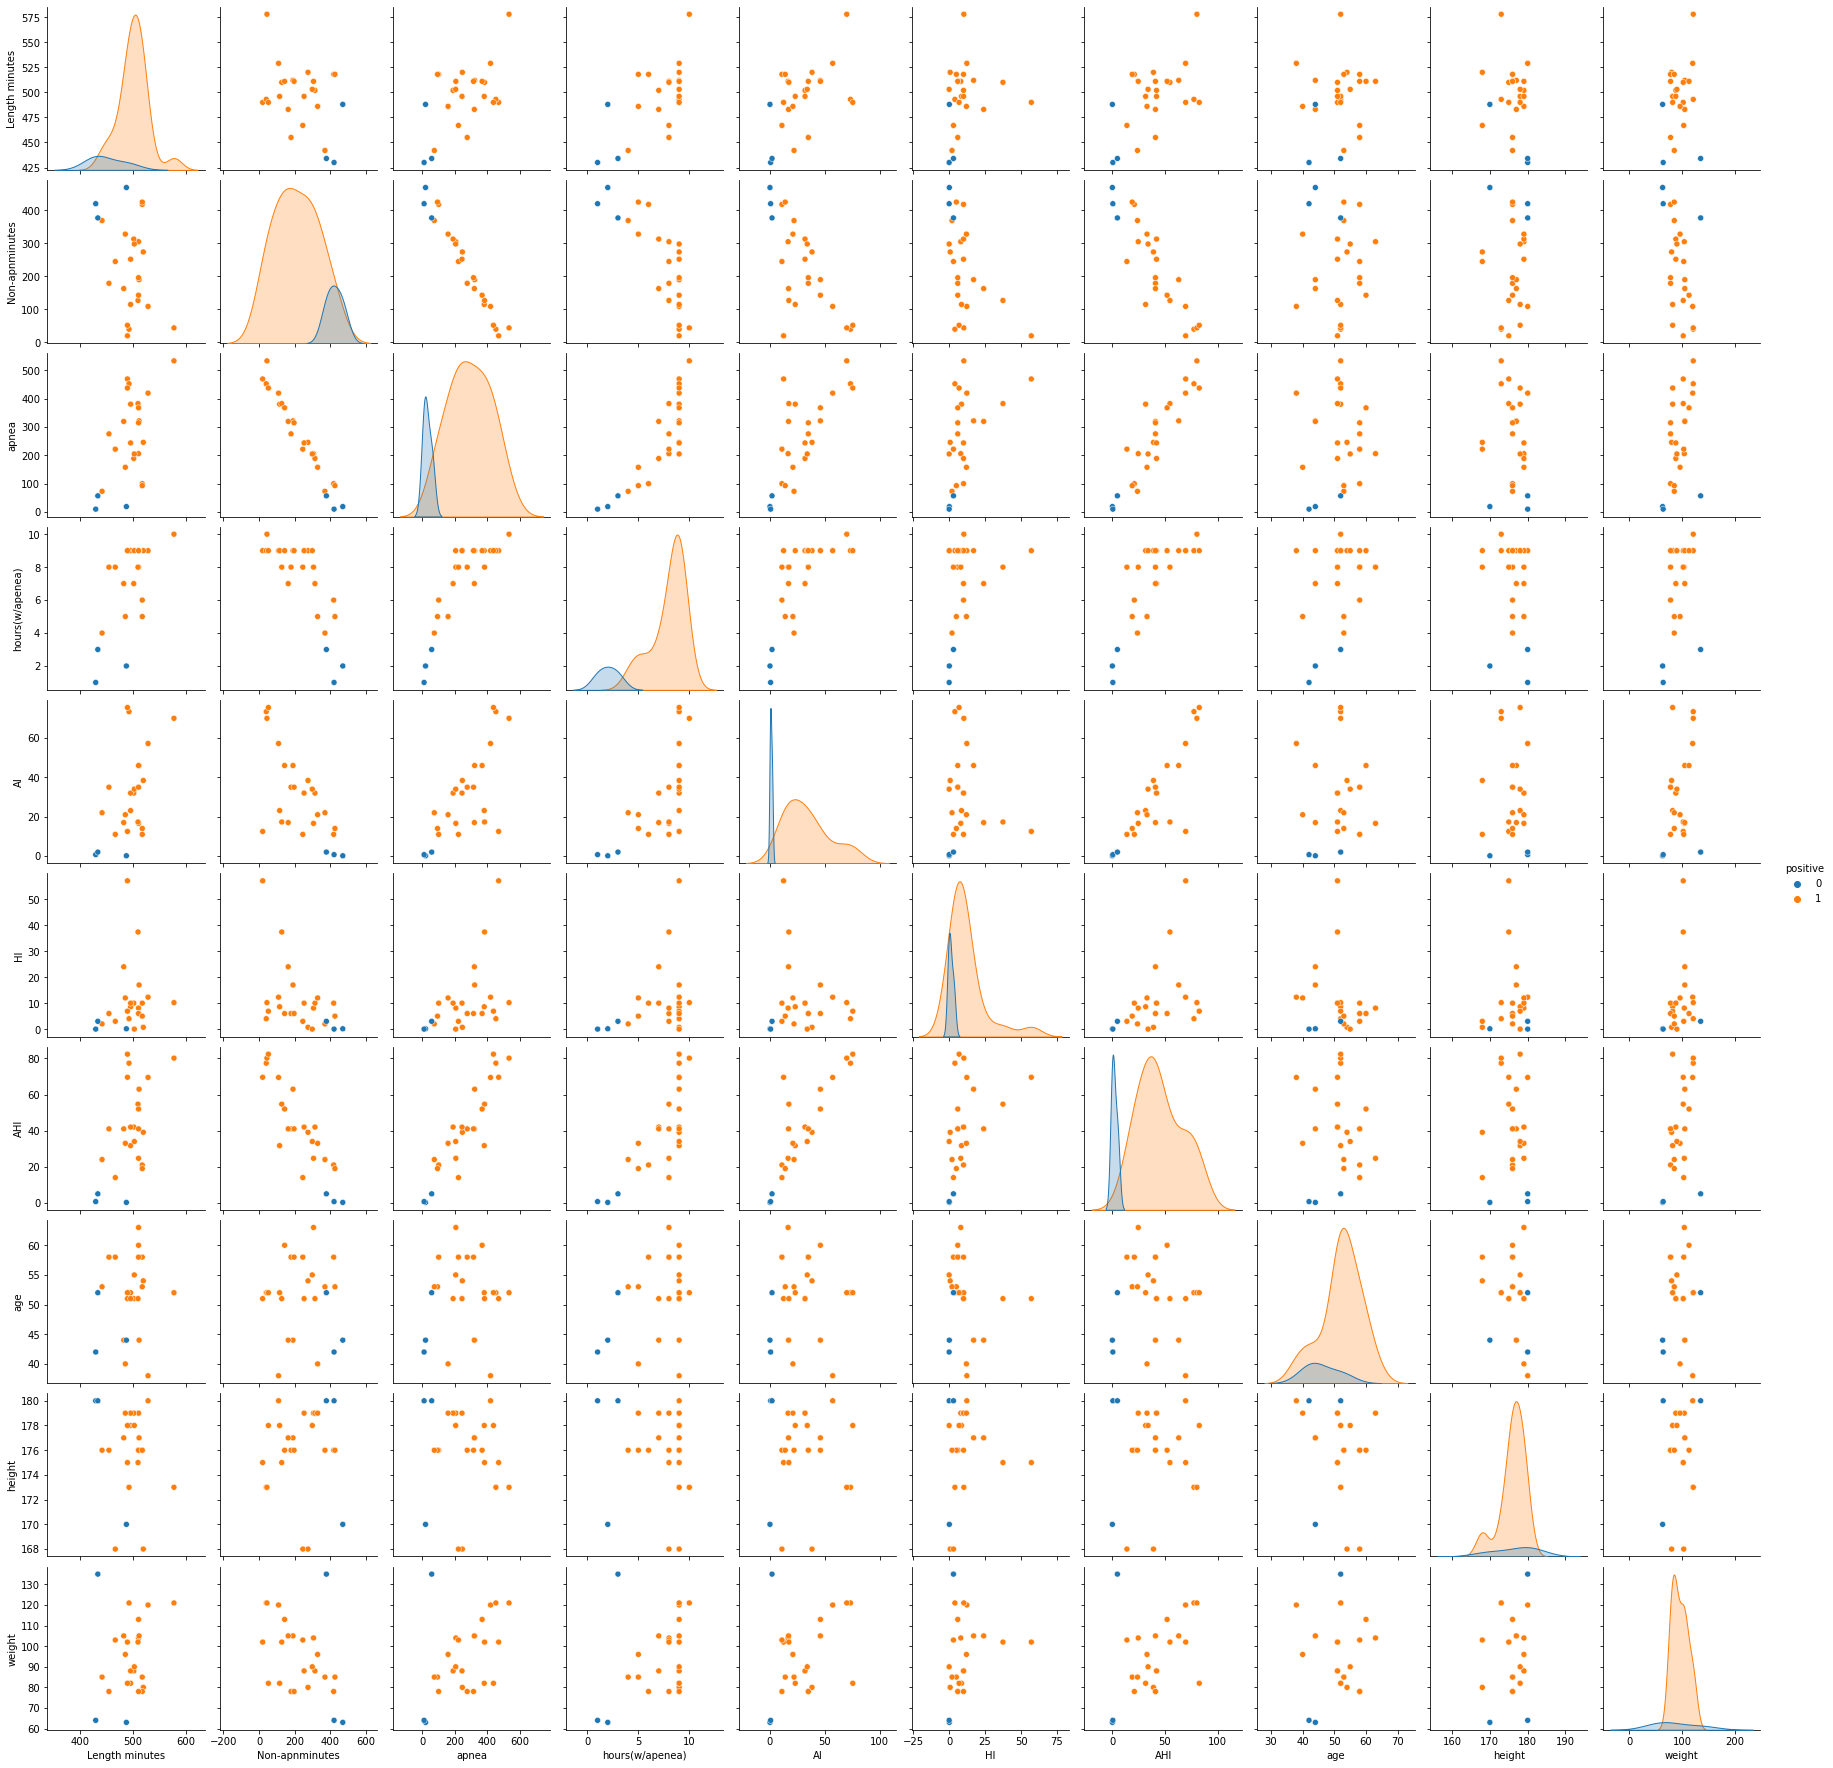

In [32]:
# Visualisation relation column with cloumn
sb.pairplot(df.head(25), hue='positive')

<AxesSubplot:xlabel='hours(w/apenea)', ylabel='AHI'>

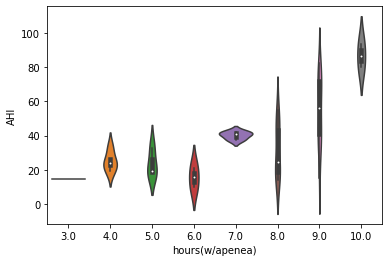

In [33]:
sb.violinplot(data=sick, x="hours(w/apenea)", y='AHI')

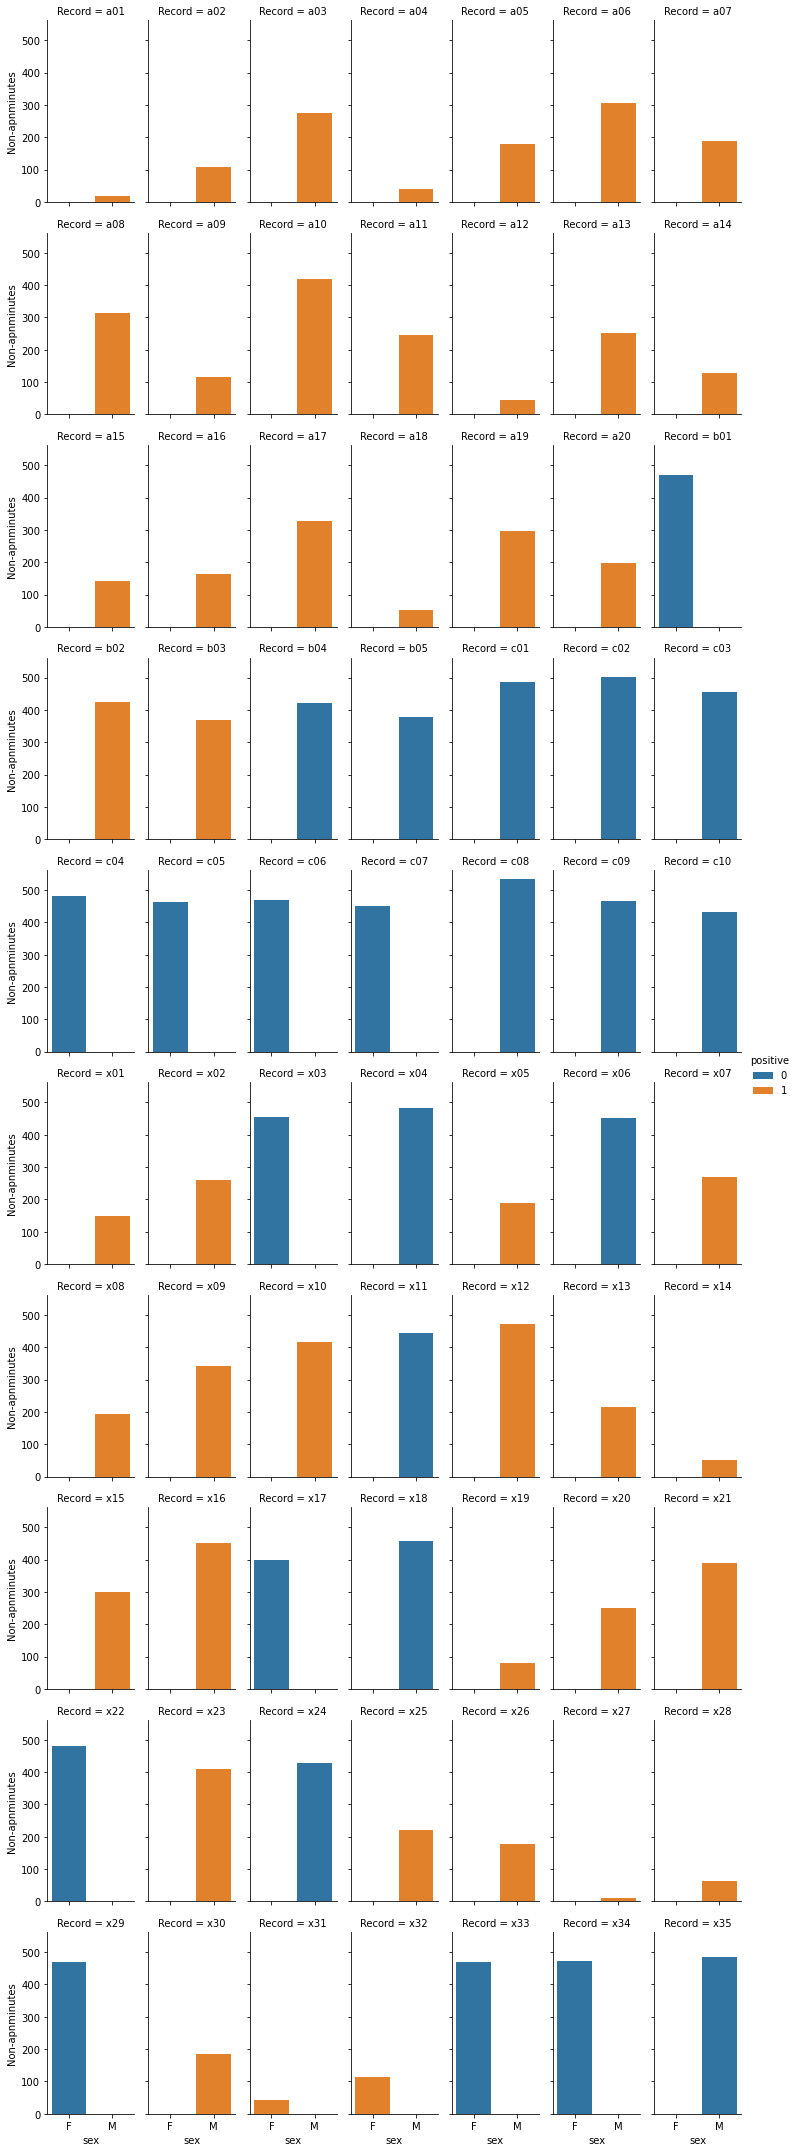

In [34]:
#for every patient time of non apnea 
g = sb.FacetGrid(df, col="Record", col_wrap=7, height=3, hue='positive', aspect=.5)
g.map(sb.barplot, "sex", "Non-apnminutes", order=['F', 'M'])
g.add_legend()

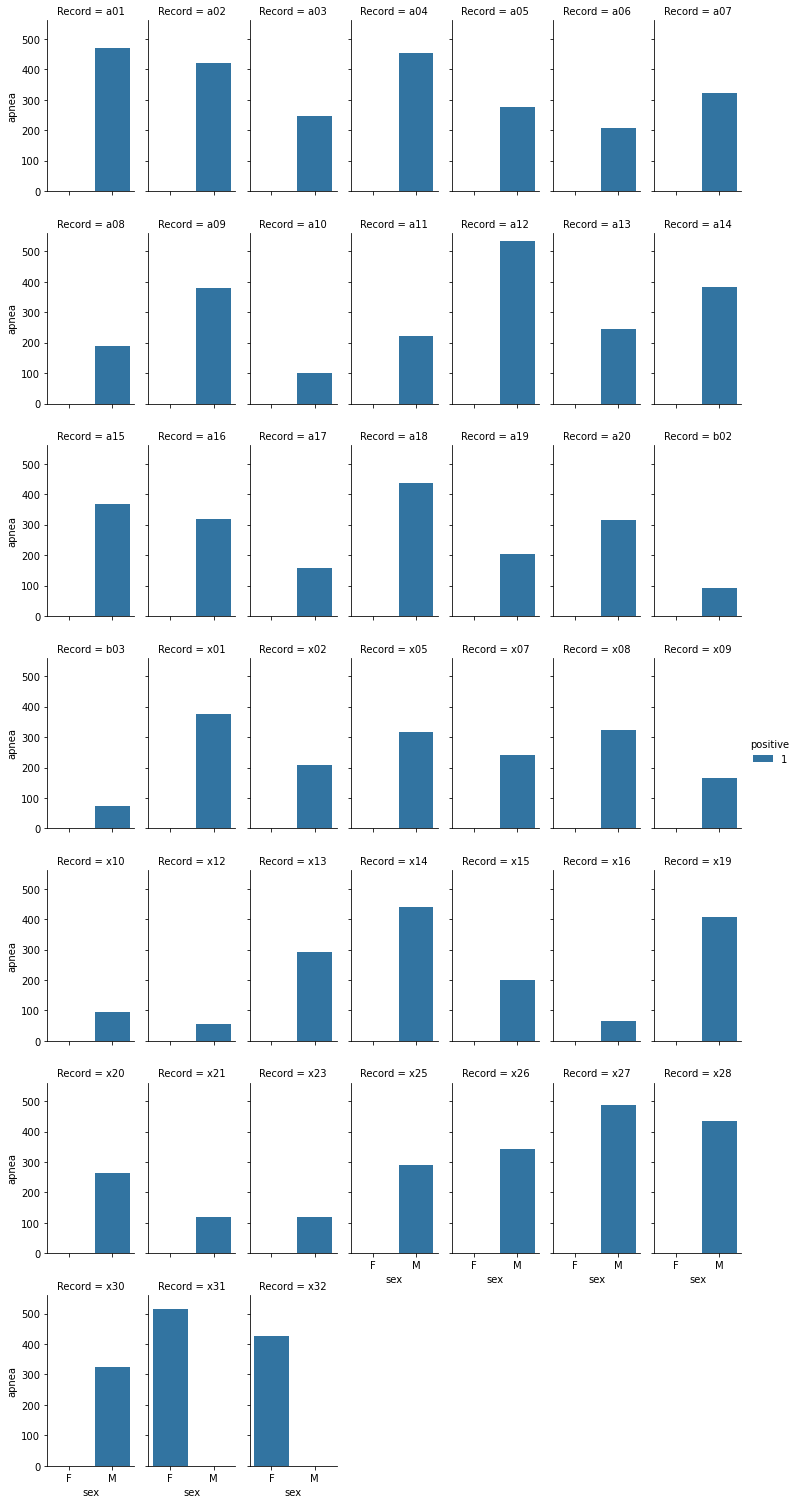

In [35]:
#this graph complete the first as you see people with long periode of non apnea but also short time of apnea
g = sb.FacetGrid(sick, col="Record", col_wrap=7, height=3, hue='positive', aspect=.5)
g.map(sb.barplot, "sex", "apnea", order=['F', 'M'])
g.add_legend()

<AxesSubplot:xlabel='AHI', ylabel='status'>

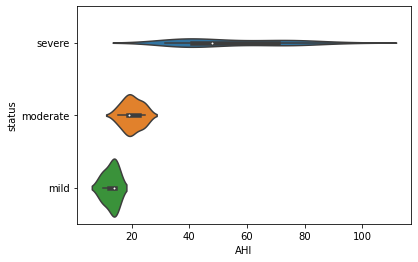

In [36]:
sb.violinplot(data=sick, x='AHI', y='status')

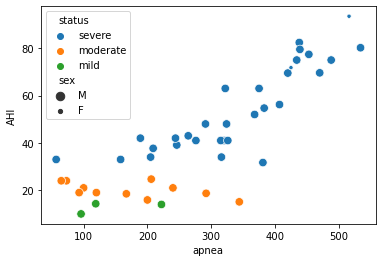

In [37]:
#Visualisation of level AHI according age . show also the severity
sb.scatterplot(data=sick, x='apnea', y='AHI', 
                hue = 'status', 
                size = 'sex');